# K-Nearest Neighbors Classification

In [69]:
import numpy as np


In [70]:
a = np.random.rand(3,4)

In [71]:
a

array([[0.37506671, 0.38095315, 0.54231439, 0.64065565],
       [0.45395605, 0.06985598, 0.70660705, 0.27102016],
       [0.50667913, 0.47775728, 0.46834644, 0.76656814]])

In [72]:
# res = 0
# for j in range(D):
#     res += (a[j] - b[j])**2
# sqrt(res)


def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

In [73]:
x = np.random.rand(1, 2)
y = np.random.rand(1, 2)
print(x)
print(y)
euclidian_distance(x, y)

[[0.9224096  0.62512547]]
[[0.63496722 0.46140153]]


array([0.33080002])

In [74]:
def score(X_test, y_test):
    y_pred = predict(X_test)

    return float(sum(y_pred == y_test))/ float(len(y_test))

In [75]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 3

    def chebyshev_modified_distance(self, a, b):
        return np.median(np.abs(a - b),axis=1)

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a-b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#         print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []

        if return_distance:
            for x_test in X_test:
                point_dist += [ self.chebyshev_modified_distance(x_test, self.X_train) ]
        else:
            for x_test in X_test:
                point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True)

            inv_dist = 1 / dist

            mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]
#             print(mean_inv_dist.shape)

            proba = []

            for i, row in enumerate(mean_inv_dist):

                row_pred = self.y_train[neigh_ind[i]]

                for k in range(self.n_classes):
                    indices = np.where(row_pred == k)
                    prob_ind = np.sum(row[indices])
                    proba.append(np.array(prob_ind))

            predict_proba = np.array(proba).reshape(X_test.shape[0],
                                                    self.n_classes)

            y_pred = np.array([np.argmax(item) for item in predict_proba])

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test


# Iris dataset (Observations/Treatments)

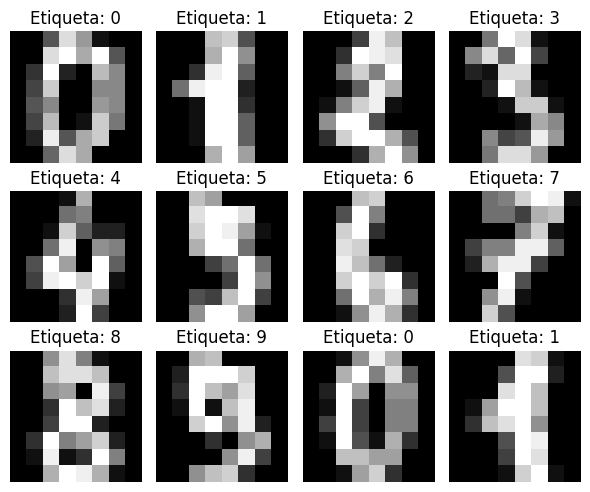

In [76]:
import sklearn.datasets as datasets
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

dataset = datasets.load_digits(as_frame=True)

X = dataset.data
y = dataset.target

# Cargar dataset de dígitos
digits = load_digits(n_class=10)

# Crear figura 3x4
fig, axes = plt.subplots(3, 4, figsize=(6, 5))

# Recorrer los primeros 12 dígitos
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')   # mostrar imagen en escala de grises
    ax.set_title(f"Etiqueta: {digits.target[i]}")  # etiqueta del dígito
    ax.axis('off')  # quitar ejes

plt.tight_layout()
plt.show()


In [77]:
print('datos')
print(len(digits.images))
print('features')
print(len(digits.feature_names))

datos
1797
features
64


In [78]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.25,stratify=y, random_state=45)



our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=8)
sklearn_classifier = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
sklearn_accuracy = sklearn_classifier.score(X_test, y_test)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],
             ['Our Implementation', 'Sklearn\'s Implementation'])

[8 8 7 7 8 7 6 4 3 9 4 7 0 9 4 0 4 8 1 9] [8 8 7 7 8 7 6 4 3 9 4 7 0 9 4 0 4 8 1 9]


,Our Implementation,Sklearn's Implementation
Accuracy,0.977778,0.977778


k=2, accuracy=0.9822
k=3, accuracy=0.9867
k=4, accuracy=0.9889
k=5, accuracy=0.9844
k=6, accuracy=0.9800
k=7, accuracy=0.9822
k=8, accuracy=0.9778
k=9, accuracy=0.9800
k=10, accuracy=0.9778
k=11, accuracy=0.9778


/tmp/ipython-input-1010391763.py:64: RuntimeWarning: divide by zero encountered in divide
  inv_dist = 1 / dist
/tmp/ipython-input-1010391763.py:66: RuntimeWarning: invalid value encountered in divide
  mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]


k=2, accuracy=0.2289
k=3, accuracy=0.2333
k=4, accuracy=0.2289
k=5, accuracy=0.2267
k=6, accuracy=0.2267
k=7, accuracy=0.2222
k=8, accuracy=0.2178
k=9, accuracy=0.2111
k=10, accuracy=0.2111
k=11, accuracy=0.2111


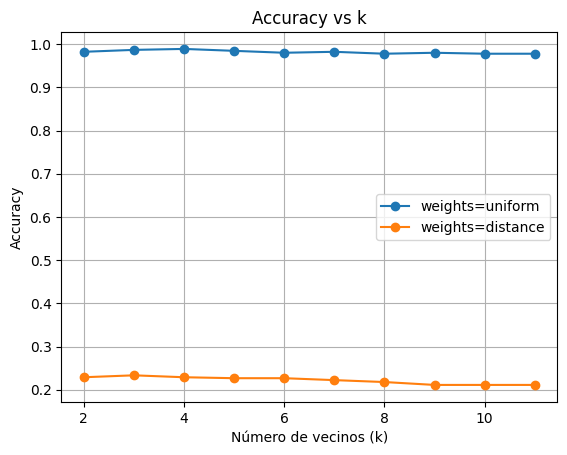

[0.2288888888888889,
 0.23333333333333334,
 0.2288888888888889,
 0.22666666666666666,
 0.22666666666666666,
 0.2222222222222222,
 0.21777777777777776,
 0.2111111111111111,
 0.2111111111111111,
 0.2111111111111111]

In [79]:
def evaluate_k_range(k_values=range(2,12), weights="uniform", show=False):
    accuracies = []

    for k in k_values:
        if weights == "distance":
            model = KNearestNeighbors(X_train, y_train, n_neighbors=k, weights="distance")
            acc, _, _ = model.score(X_test, y_test)
        elif weights == "uniform":
            model = KNearestNeighbors(X_train, y_train, n_neighbors=k, weights="uniform")
            acc, _, _ = model.score(X_test, y_test)
        else:
            model = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
            acc = model.score(X_test, y_test)

        accuracies.append(acc)
        print(f"k={k}, accuracy={acc:.4f}")

    # No plt.figure() para que los gráficos se acumulen
    plt.plot(k_values, accuracies, marker='o', label=f"weights={weights}")

    plt.xlabel("Número de vecinos (k)")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs k")
    plt.grid(True)
    plt.legend()

    if show:
        plt.show()

    return accuracies

evaluate_k_range(weights="uniform")
evaluate_k_range(weights="distance", show=True)


k=2, accuracy=0.9778
k=3, accuracy=0.9778
k=4, accuracy=0.9778
k=5, accuracy=0.9778
k=6, accuracy=0.9778
k=7, accuracy=0.9778
k=8, accuracy=0.9778
k=9, accuracy=0.9778
k=10, accuracy=0.9778
k=11, accuracy=0.9778


/tmp/ipython-input-1010391763.py:64: RuntimeWarning: divide by zero encountered in divide
  inv_dist = 1 / dist
/tmp/ipython-input-1010391763.py:66: RuntimeWarning: invalid value encountered in divide
  mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]


k=2, accuracy=0.2289
k=3, accuracy=0.2333
k=4, accuracy=0.2289
k=5, accuracy=0.2267
k=6, accuracy=0.2267
k=7, accuracy=0.2222
k=8, accuracy=0.2178
k=9, accuracy=0.2111
k=10, accuracy=0.2111
k=11, accuracy=0.2111


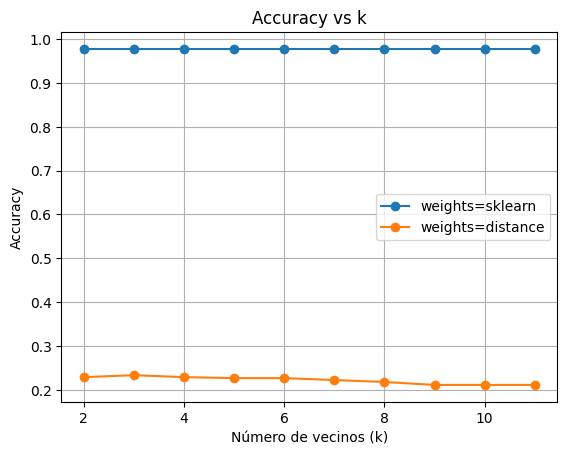

[0.2288888888888889,
 0.23333333333333334,
 0.2288888888888889,
 0.22666666666666666,
 0.22666666666666666,
 0.2222222222222222,
 0.21777777777777776,
 0.2111111111111111,
 0.2111111111111111,
 0.2111111111111111]

In [80]:
evaluate_k_range(weights="sklearn")
evaluate_k_range(weights="distance", show=True)

Tabla comparativa de sklearn vs distance segun los valores de k

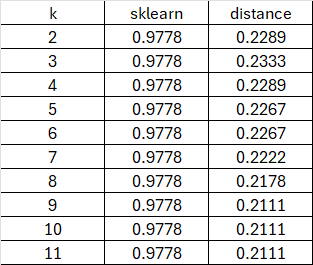